In [1]:
# Import necessary libraries
import pandas as pd
pd.set_option("display.max_columns", 120) #to remove the limit of columns shows as output
import numpy as np
from lazypredict.Supervised import LazyClassifier
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
import os
warnings.filterwarnings('ignore')

sns.set_palette('husl')

In [2]:
pd.set_option('display.max_columns', None) #Enable to show max columns in code cells
sns.set_style('darkgrid') #set sns plot background
matplotlib.rcParams['font.size'] = 14 #set the deafult plot font size for this notebook
matplotlib.rcParams['figure.figsize'] = (10, 6) #set the deafult plot size for this notebook
matplotlib.rcParams['figure.facecolor'] = '#00000000' #set matplotlib plot background
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
train = pd.read_csv(r'../data/cs-training.csv', encoding='ISO-8859-1')
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766,45,2,0.803,9120.000,13,0,6,0,2.000
1,2,0,0.957,40,0,0.122,2600.000,4,0,0,0,1.000
2,3,0,0.658,38,1,0.085,3042.000,2,1,0,0,0.000
3,4,0,0.234,30,0,0.036,3300.000,5,0,0,0,0.000
4,5,0,0.907,49,1,0.025,63588.000,7,0,1,0,0.000


In [4]:
test = pd.read_csv(r'../data/cs-test.csv', encoding='ISO-8859-1')
test.head()



,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.886,43,0,0.178,5700.000,4,0,0,0,0.000
1,2,NaN,0.463,57,0,0.527,9141.000,15,0,4,0,2.000
2,3,NaN,0.043,59,0,0.688,5083.000,12,0,1,0,2.000
3,4,NaN,0.280,38,1,0.926,3200.000,7,0,2,0,0.000
4,5,NaN,1.000,27,0,0.020,3865.000,4,0,0,0,1.000


# EDA

In [5]:
train.info()
train.describe()
train.isnull().sum()
train.isnull().sum()/len(train)
train.isnull().sum()/len(train)*100

# Check for missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

## Revolving Utilization of Unsecured Lines

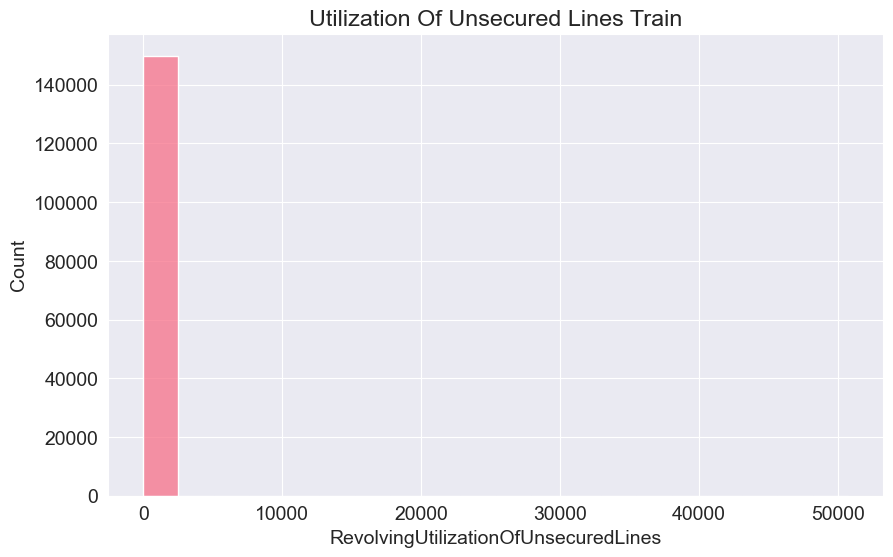

In [6]:
sns.histplot(data=train, x='RevolvingUtilizationOfUnsecuredLines', bins=20)
plt.title('Utilization Of Unsecured Lines Train')
plt.show()

In [7]:
train['RevolvingUtilizationOfUnsecuredLines'].describe()

count   150000.000
mean         6.048
std        249.755
min          0.000
25%          0.030
50%          0.154
75%          0.559
max      50708.000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

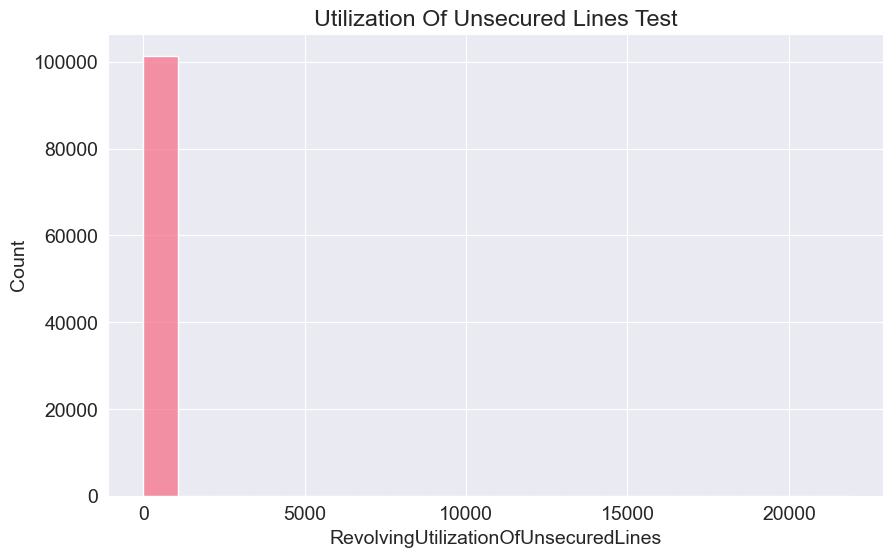

In [8]:
sns.histplot(data=test, x='RevolvingUtilizationOfUnsecuredLines', bins=20)
plt.title('Utilization Of Unsecured Lines Test')
plt.show()

## Age

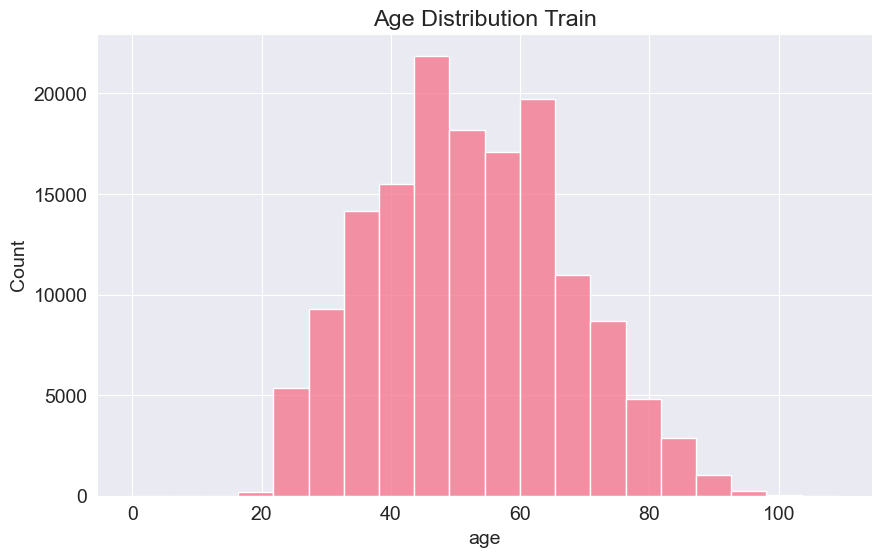

In [9]:
# Histogram
sns.histplot(data=train, x='age', bins=20)
plt.title('Age Distribution Train')
plt.show()

In [10]:
train['age'].describe()

count   150000.000
mean        52.295
std         14.772
min          0.000
25%         41.000
50%         52.000
75%         63.000
max        109.000
Name: age, dtype: float64

## NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate¶

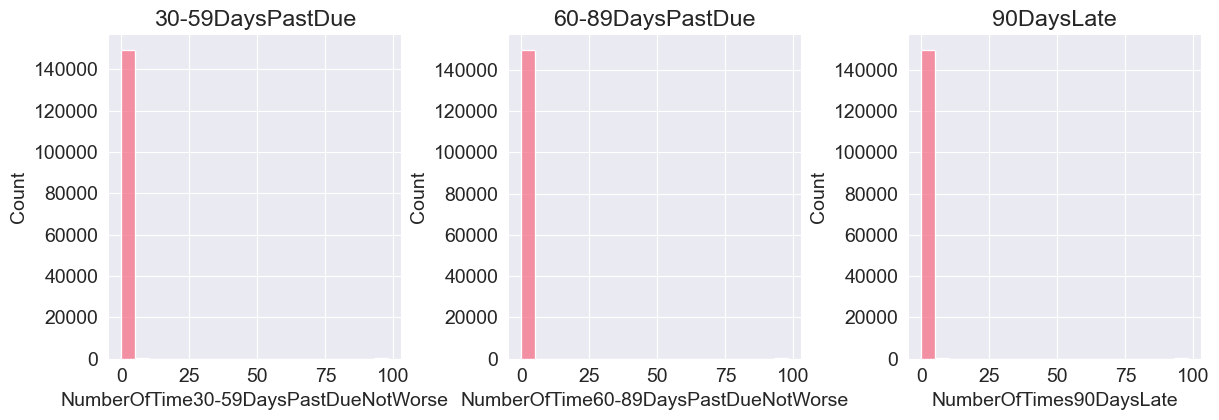

In [11]:
# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot column A
sns.histplot(data=train, x='NumberOfTime30-59DaysPastDueNotWorse', ax=axs[0])
axs[0].set_title('30-59DaysPastDue')

# Plot column B
sns.histplot(data=train, x='NumberOfTime60-89DaysPastDueNotWorse', ax=axs[1])
axs[1].set_title('60-89DaysPastDue')

# Plot column C
sns.histplot(data=train, x='NumberOfTimes90DaysLate', ax=axs[2])
axs[2].set_title('90DaysLate')

# Adjust spacing between subplots
plt.tight_layout(pad=0)

# Display the plots
plt.show()

In [12]:
train[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']].corr()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
NumberOfTime30-59DaysPastDueNotWorse,1.000,0.987,0.984
NumberOfTime60-89DaysPastDueNotWorse,0.987,1.000,0.993
NumberOfTimes90DaysLate,0.984,0.993,1.000


In [13]:
train['SeriousDlqin2yrs'][(train['NumberOfTime30-59DaysPastDueNotWorse'] == 98) & 
                          (train['NumberOfTime60-89DaysPastDueNotWorse'] == 98) & (
                              train['NumberOfTimes90DaysLate'] == 98)].value_counts()

SeriousDlqin2yrs
1    143
0    121
Name: count, dtype: int64

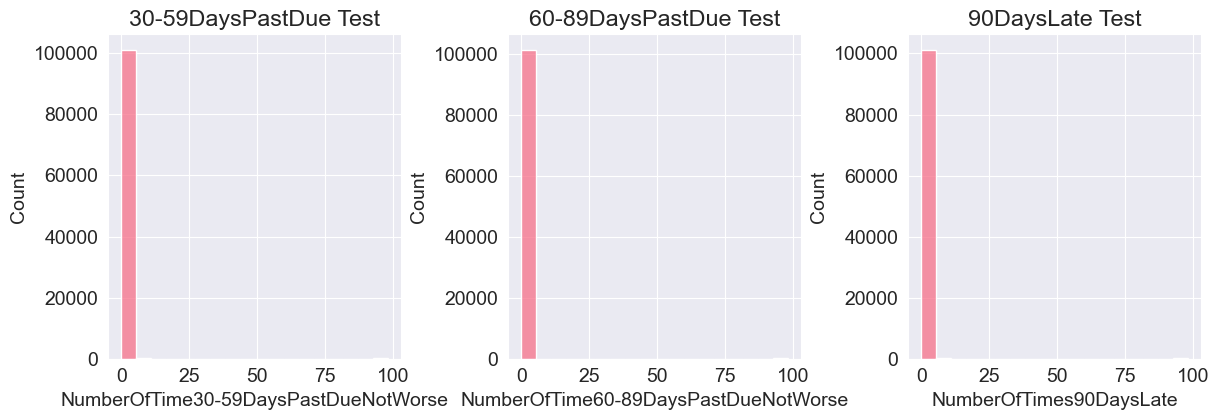

In [14]:
# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot column A
sns.histplot(data=test, x='NumberOfTime30-59DaysPastDueNotWorse', ax=axs[0])
axs[0].set_title('30-59DaysPastDue Test')

# Plot column B
sns.histplot(data=test, x='NumberOfTime60-89DaysPastDueNotWorse', ax=axs[1])
axs[1].set_title('60-89DaysPastDue Test')

# Plot column C
sns.histplot(data=test, x='NumberOfTimes90DaysLate', ax=axs[2])
axs[2].set_title('90DaysLate Test')

# Adjust spacing between subplots
plt.tight_layout(pad=0)

# Display the plots
plt.show()

## DebtRatio

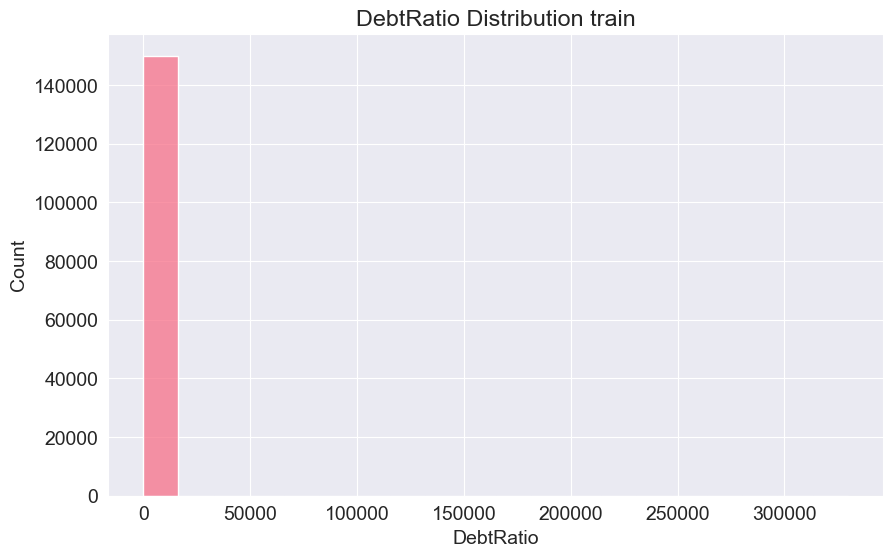

In [15]:
sns.histplot(data=train, x='DebtRatio', bins=20)
plt.title('DebtRatio Distribution train')
plt.show()

## Monthly Income

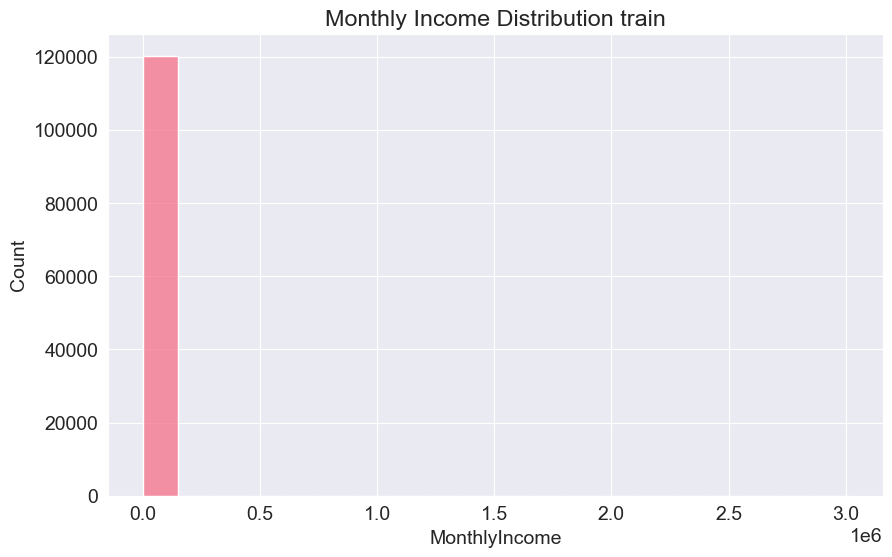

In [16]:
# Histogram
sns.histplot(data=train, x='MonthlyIncome', bins=20)
plt.title('Monthly Income Distribution train')
plt.show()

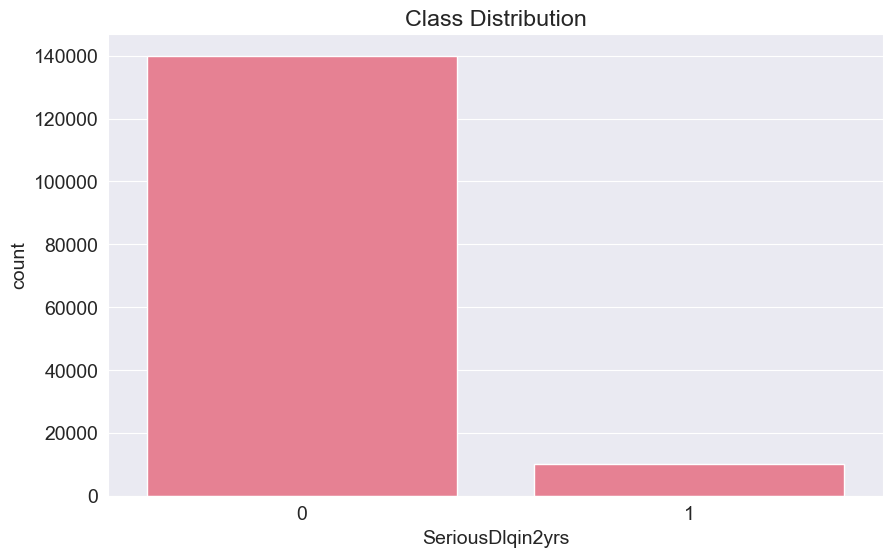

In [17]:
# Countplot
sns.countplot(x='SeriousDlqin2yrs', data=train)
plt.title('Class Distribution')
plt.show()

In [18]:
train=train.iloc[:,1:] # This selectes the required data for modelling.
train=train[train['age']>=21] # This filters the age to start from 21 as we saw the outliers on training dataset.
test=test.iloc[:,2:] # This selectes the required data in the test dataset for modelling.

# Below are additional outliers filtering to match the test dataset but it yielded in poor accuracy. But feel free to experiment
#train=train[train['RevolvingUtilizationOfUnsecuredLines']<=21821.000]
#train=train[train['DebtRatio']<=268326.000]

In [19]:
test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.886,43,0,0.178,5700.000,4,0,0,0,0.000
1,0.463,57,0,0.527,9141.000,15,0,4,0,2.000
2,0.043,59,0,0.688,5083.000,12,0,1,0,2.000
3,0.280,38,1,0.926,3200.000,7,0,2,0,0.000
4,1.000,27,0,0.020,3865.000,4,0,0,0,1.000
...,...,...,...,...,...,...,...,...,...,...
101498,0.283,24,0,0.069,1400.000,5,0,0,0,0.000
101499,0.922,36,3,0.934,7615.000,8,0,2,0,4.000
101500,0.082,70,0,836.000,NaN,3,0,0,0,NaN
101501,0.335,56,0,3568.000,NaN,8,0,2,1,3.000


In [20]:
input_cols=['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
target_cols='SeriousDlqin2yrs'

In [21]:
train_inputs=train[input_cols]
train_targets=train[target_cols]
test_inputs=test[input_cols]

In [22]:
train_inputs.describe().loc[['min','max']] # Before scaling


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.000,21.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,50708.000,109.000,98.000,329664.000,3008750.000,58.000,98.000,54.000,98.000,20.000


In [23]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()

scaler.fit(train_inputs[input_cols])
train_inputs[input_cols]=scaler.transform(train_inputs[input_cols])
test_inputs[input_cols]=scaler.transform(test_inputs[input_cols])

In [24]:
train_inputs.describe().loc[['min','max']] #after scaling


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,-0.291,-1.409,0.000,-0.529,-1.114,-1.333,0.000,-0.500,0.000,0.000
max,95824.009,2.591,98.000,475579.256,619.375,8.333,98.000,26.500,98.000,20.000


In [25]:
train_inputs.isna().sum(),test_inputs.isna().sum()

(RevolvingUtilizationOfUnsecuredLines        0
 age                                         0
 NumberOfTime30-59DaysPastDueNotWorse        0
 DebtRatio                                   0
 MonthlyIncome                           29731
 NumberOfOpenCreditLinesAndLoans             0
 NumberOfTimes90DaysLate                     0
 NumberRealEstateLoansOrLines                0
 NumberOfTime60-89DaysPastDueNotWorse        0
 NumberOfDependents                       3924
 dtype: int64,
 RevolvingUtilizationOfUnsecuredLines        0
 age                                         0
 NumberOfTime30-59DaysPastDueNotWorse        0
 DebtRatio                                   0
 MonthlyIncome                           20103
 NumberOfOpenCreditLinesAndLoans             0
 NumberOfTimes90DaysLate                     0
 NumberRealEstateLoansOrLines                0
 NumberOfTime60-89DaysPastDueNotWorse        0
 NumberOfDependents                       2626
 dtype: int64)

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
train_inputs[input_cols] = imputer.fit_transform(train_inputs[input_cols])
test_inputs[input_cols] = imputer.fit_transform(test_inputs[input_cols])

In [27]:
train_inputs.isna().sum(),test_inputs.isna().sum()

(RevolvingUtilizationOfUnsecuredLines    0
 age                                     0
 NumberOfTime30-59DaysPastDueNotWorse    0
 DebtRatio                               0
 MonthlyIncome                           0
 NumberOfOpenCreditLinesAndLoans         0
 NumberOfTimes90DaysLate                 0
 NumberRealEstateLoansOrLines            0
 NumberOfTime60-89DaysPastDueNotWorse    0
 NumberOfDependents                      0
 dtype: int64,
 RevolvingUtilizationOfUnsecuredLines    0
 age                                     0
 NumberOfTime30-59DaysPastDueNotWorse    0
 DebtRatio                               0
 MonthlyIncome                           0
 NumberOfOpenCreditLinesAndLoans         0
 NumberOfTimes90DaysLate                 0
 NumberRealEstateLoansOrLines            0
 NumberOfTime60-89DaysPastDueNotWorse    0
 NumberOfDependents                      0
 dtype: int64)

In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_targets , test_size=0.2, random_state=42)

In [31]:
clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)


  0%|          | 0/32 [00:00<?, ?it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9362666666666667, 'Balanced Accuracy': 0.5772812540464567, 'ROC AUC': 0.5772812540464567, 'F1 Score': 0.9200416321852383, 'Time taken': 4.0710813999176025}
{'Model': 'BaggingClassifier', 'Accuracy': 0.9319666666666667, 'Balanced Accuracy': 0.5799664765654623, 'ROC AUC': 0.5799664765654623, 'F1 Score': 0.9178174839909916, 'Time taken': 7.706862449645996}
{'Model': 'BernoulliNB', 'Accuracy': 0.9302, 'Balanced Accuracy': 0.6359977265842354, 'ROC AUC': 0.6359977265842354, 'F1 Score': 0.9235604936952757, 'Time taken': 0.10223984718322754}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9352, 'Balanced Accuracy': 0.5194969649834008, 'ROC AUC': 0.5194969649834008, 'F1 Score': 0.9083371509203824, 'Time taken': 1.4796292781829834}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.8969, 'Balanced Accuracy': 0.6063144630759171, 'ROC AUC': 0.6063144630759171, 'F1 Score': 0.8996646675592874, 'Time taken': 1.1358966827392578}
{'Model': 'DummyClassifier

  File "c:\Users\vanhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 8067, number of negative: 111932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 119999, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067226 -> initscore=-2.630110
[LightGBM] [Info] Start training from score -2.630110
{'Model': 'LGBMClassifier', 'Accuracy': 0.9367333333333333, 'Balanced Accuracy': 0.5913001597474885, 'ROC AUC': 0.5913001597474885, 'F1 Score': 0.9224329406083006, 'Time taken': 0.5908253192901611}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis     0.908              0.673    0.673     0.912   


In [32]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.908,0.673,0.673,0.912,0.126
NearestCentroid,0.751,0.638,0.638,0.810,0.099
BernoulliNB,0.930,0.636,0.636,0.924,0.102
DecisionTreeClassifier,0.897,0.606,0.606,0.900,1.136
ExtraTreeClassifier,0.900,0.605,0.605,0.902,0.209
ExtraTreesClassifier,0.935,0.592,0.592,0.921,9.349
LGBMClassifier,0.937,0.591,0.591,0.922,0.591
XGBClassifier,0.935,0.591,0.591,0.921,1.628
RandomForestClassifier,0.936,0.590,0.590,0.922,22.213


In [ ]:
# Select the best model
best_model = models.loc[models['Accuracy'].idxmax()]
print(best_model)

# Train the best model

